<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/phospho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
download.file("https://raw.githubusercontent.com/ProteintechLab/Statistics/main/phospho.txt", "phospho.txt")

#Fetch the file from Github

In [ ]:
%%R
library(tidyverse)
library(broom)

#Load the packages

In [ ]:
%%R
phospho<-read_table("phospho.txt")

#Load the file, here we are using read_table for the *.txt file

In [5]:
%%R
phospho

#Print of the data

# A tibble: 36 × 9
   pAFT2 pHSP27  pP38  pP90  pMEK pSTAT3 GROUP TREATMENT SUBJECT
   <dbl>  <dbl> <dbl> <dbl> <dbl>  <dbl> <chr> <chr>       <dbl>
 1 1114.    112  225.  235  1711.  1711. H     Control         1
 2  433.    132  156.   86   224.  1711. H     Control         2
 3  232.    193  284.   76   224.  1915. H     Control         3
 4  727.    176  174.   87   843.   382. H     Control         4
 5 1538.    101  252.  228. 2196.  1199. H     Control         5
 6 1068.    311  265.   97   995.   547. H     Control         6
 7  853.    319  313.  162  2159.   294. H     Control         7
 8  191.    352  182.   79   361.  1360. H     Control         8
 9 2827.    156  229.  230.  766.   316. H     Control         9
10  735.    195  319.  181  1711.  1642. RA    Control        10
# ℹ 26 more rows
# ℹ Use `print(n = ...)` to see more rows


In [6]:
%%R
phosphoL<-phospho%>%pivot_longer(cols=starts_with("p"), values_to="Intensity", names_to="protein")

#Here we are reshaping the data to the long format, colllecting any column that starts with a "p", naming this "protein", the values associated with that column, "intensity"

In [7]:
%%R
phosphoL
#Print the data

# A tibble: 216 × 5
   GROUP TREATMENT SUBJECT protein Intensity
   <chr> <chr>       <dbl> <chr>       <dbl>
 1 H     Control         1 pAFT2       1114.
 2 H     Control         1 pHSP27       112 
 3 H     Control         1 pP38         225.
 4 H     Control         1 pP90         235 
 5 H     Control         1 pMEK        1711.
 6 H     Control         1 pSTAT3      1711.
 7 H     Control         2 pAFT2        433.
 8 H     Control         2 pHSP27       132 
 9 H     Control         2 pP38         156.
10 H     Control         2 pP90          86 
# ℹ 206 more rows
# ℹ Use `print(n = ...)` to see more rows


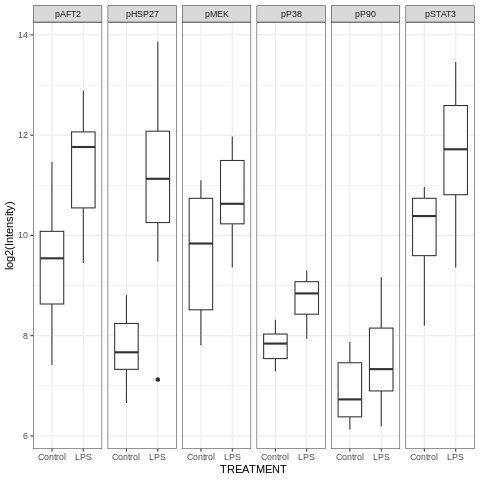

In [8]:
%%R
phosphoL%>%ggplot(aes(TREATMENT,log2(Intensity)))+geom_boxplot()+facet_grid(~protein)+theme_bw()

#To plot the data, were are making a graph for each protein, using facet_grid, we could also change the group asthetic

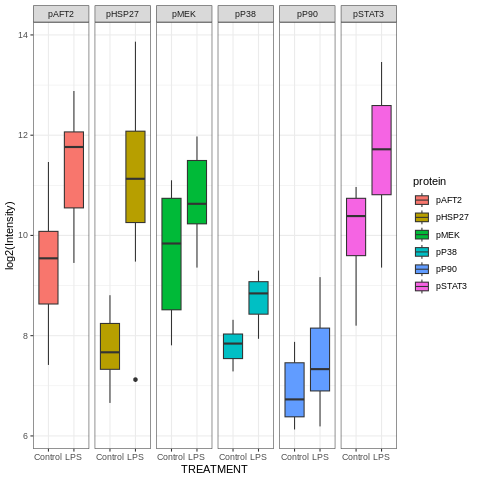

In [9]:
%%R
phosphoL%>%ggplot(aes(TREATMENT,log2(Intensity), fill=protein))+geom_boxplot()+facet_grid(~protein)+theme_bw()
#Coloured by protein

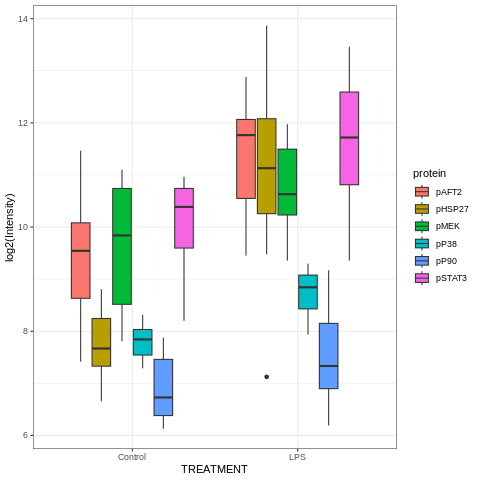

In [10]:
%%R
phosphoL%>%ggplot(aes(TREATMENT,log2(Intensity), fill=protein))+geom_boxplot()+theme_bw()

#Here we have removed the facet_grid and the data is now plotted on one axis.

In [20]:
%%R
pval<-phosphoL %>%
  split(.$protein) %>%
  map(~ tidy(t.test(log2(Intensity) ~ TREATMENT, data = .x)))
pval

#Here is an example of performing a T-test on each protein across the treatment, we are using the tidy function
#from the Broom package to make the outputs easier to hnadle and record.

$pAFT2
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic    p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>      <dbl>     <dbl>    <dbl>     <dbl>
1    -2.09      9.34      11.4     -5.78 0.00000174      33.6    -2.83     -1.36
# ℹ 2 more variables: method <chr>, alternative <chr>

$pHSP27
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic    p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>      <dbl>     <dbl>    <dbl>     <dbl>
1    -3.42      7.72      11.1     -8.56    1.84e-8      22.1    -4.25     -2.60
# ℹ 2 more variables: method <chr>, alternative <chr>

$pMEK
# A tibble: 1 × 10
  estimate estimate1 estimate2 statistic p.value parameter conf.low conf.high
     <dbl>     <dbl>     <dbl>     <dbl>   <dbl>     <dbl>    <dbl>     <dbl>
1    -1.15      9.64      10.8     -3.48 0.00160      28.8    -1.83    -0.475
# ℹ 2 more variables: method <chr>, alternative <chr>

$pP38
# A tibble: 1 × 10
  estimate e

In [21]:
%%R
pval_combined <- pval %>%
  bind_rows(.id = "protein")

#The output above is list of dataframes, using bind_rows, we can extract the data to a new dataframe

In [22]:
%%R
pval_combined

# A tibble: 6 × 11
  protein estimate estimate1 estimate2 statistic      p.value parameter conf.low
  <chr>      <dbl>     <dbl>     <dbl>     <dbl>        <dbl>     <dbl>    <dbl>
1 pAFT2     -2.09       9.34     11.4      -5.78 0.00000174        33.6    -2.83
2 pHSP27    -3.42       7.72     11.1      -8.56 0.0000000184      22.1    -4.25
3 pMEK      -1.15       9.64     10.8      -3.48 0.00160           28.8    -1.83
4 pP38      -0.937      7.82      8.76     -7.50 0.0000000200      30.7    -1.19
5 pP90      -0.587      6.91      7.50     -2.43 0.0208            31.7    -1.08
6 pSTAT3    -1.63      10.0      11.7      -4.53 0.0000780         31.8    -2.36
# ℹ 3 more variables: conf.high <dbl>, method <chr>, alternative <chr>


In [23]:
%%R
pval_combined <- pval_combined %>%
  mutate(p.adjust = p.adjust(p.value, method = "BH"))

#Now we have p values we can correct for multiple comparisons

In [26]:

%%R
pval_combined <- pval_combined %>%
  mutate(p.adjust = p.adjust(p.value, method = "bonferroni"))

#We can also use the Bonferroni correction

In [27]:
%%R
pval_combined%>%select(protein, p.value, p.adjust)

#To disply the p values and corrected pvalues, we have selected 3 columns

# A tibble: 6 × 3
  protein      p.value    p.adjust
  <chr>          <dbl>       <dbl>
1 pAFT2   0.00000174   0.0000104  
2 pHSP27  0.0000000184 0.000000110
3 pMEK    0.00160      0.00960    
4 pP38    0.0000000200 0.000000120
5 pP90    0.0208       0.125      
6 pSTAT3  0.0000780    0.000468   
